### **ML Algorithm Implementations**
- Two algorithms are implemented on EIS pre-processed data that are used for capacity estimation.
1. GPR (Gaussian Process Regression)
2. Artificial Neural Network

In [1]:
import numpy as np

# Load the EIS_data.txt file
EIS_data = np.loadtxt("ML\EIS_data.txt")
# Load the Capacity_data.txt file
Capacity_data = np.loadtxt("ML\Capacity_data.txt")
# Load the EIS_data_35C02.txt file
EIS_data_35C02 = np.loadtxt("ML\EIS_data_35C02.txt")
# Load the Capacity_data_35.txt file
Capacity_data_35 = np.loadtxt("ML\Capacity_data_35.txt")

In [2]:
# Standardized the Data
from sklearn.preprocessing import StandardScaler

# Normalize the training and testing data
scaler = StandardScaler().fit(EIS_data)
X_train = scaler.transform(EIS_data)
X_test = scaler.transform(EIS_data_35C02)

Y_train = Capacity_data

# Display the first few rows of normalized data for inspection
X_train[:5, :], X_test[:5, :]

(array([[-0.14774908, -0.14757984, -0.15548777, -0.16001751, -0.16758967,
         -0.16394904, -0.16777032, -0.17612107, -0.17798087, -0.17366507,
         -0.18366417, -0.17919466, -0.18491467, -0.18314812, -0.17952392,
         -0.18469185, -0.17965053, -0.17315581, -0.17650467, -0.17638535,
         -0.17379208, -0.17075891, -0.16640826, -0.16947453, -0.15175642,
         -0.15017751, -0.1431184 , -0.13907074, -0.14625481, -0.1467823 ,
         -0.17701388, -0.21659406, -0.27636468, -0.34401722, -0.42645606,
         -0.48936273, -0.55200527, -0.60180129, -0.63369657, -0.66131199,
         -0.67578851, -0.68407054, -0.68867889, -0.69308818, -0.69312308,
         -0.69228241, -0.69106622, -0.6934243 , -0.69791026, -0.69964173,
         -0.70085427, -0.70083281, -0.7068068 , -0.71183331, -0.71243543,
         -0.70265026, -0.70780148, -0.73640979, -0.77345009, -0.79525665,
         -0.92243184, -0.97651272, -0.70097799, -0.47657513, -0.30110684,
         -0.28458887, -0.1708481 , -0.

### **GPR Implementation**

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

# Define the kernel for the Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

# Initialize the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gpr.fit(X_train, Y_train)

# Estimate the capacity for the test data
Y_pred, Y_std = gpr.predict(X_test, return_std=True)

# Return the first few estimated capacities and the corresponding standard deviations
Y_pred[:5], Y_std[:5]

(array([42.47453128, 41.91345338, 41.74788711, 41.49467533, 40.98848081]),
 array([0.99092204, 1.04371038, 1.04519817, 1.04724834, 1.05643905]))

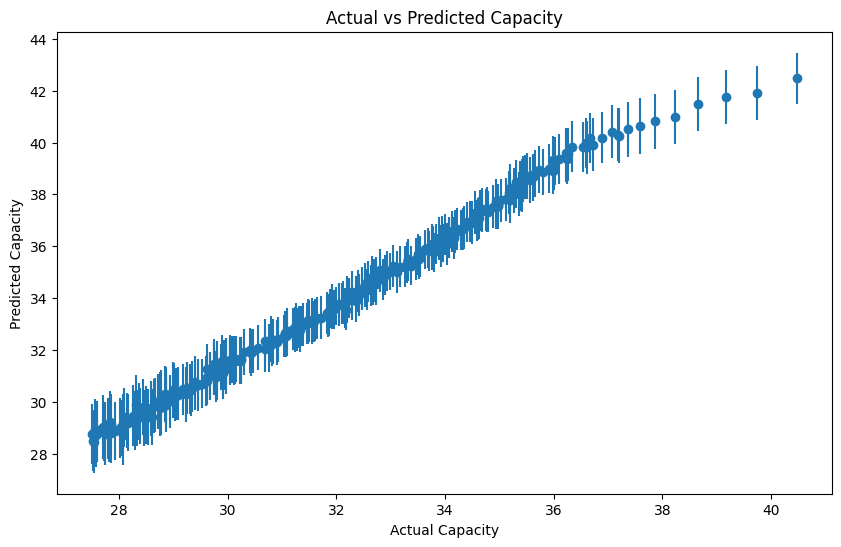

In [11]:
# plot the actual and predicted capacity values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.errorbar(Capacity_data_35, Y_pred, yerr=Y_std, fmt='o')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Actual vs Predicted Capacity')
plt.show()

### **ANN (Artificial Neural Network) Implementation**

In [ ]:
# install tensorflow
%pip install -q tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse')

# Train the model
ann_history = ann_model.fit(X_train_sub, Y_train_sub, validation_data=(X_val, Y_val), epochs=50, batch_size=32, verbose=1)

# Predict using the ANN model
Y_pred_ann = ann_model.predict(X_test).flatten()

# Calculate the MSE for the ANN predictions
mse_ann = mean_squared_error(Capacity_data_35, Y_pred_ann)

mse_ann


Epoch 1/50
34/34 [==============================] - 1s 6ms/step - loss: 574.8641 - val_loss: 78.6785
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 130.0332 - val_loss: 43.6756
Epoch 3/50
34/34 [==============================] - 0s 5ms/step - loss: 91.4112 - val_loss: 20.4050
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 62.9074 - val_loss: 21.0090
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 60.8416 - val_loss: 34.9489
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 54.9185 - val_loss: 13.8382
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 48.8032 - val_loss: 18.1200
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 48.8752 - val_loss: 14.3009
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 42.7399 - val_loss: 9.9767
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 42.7658 - val_loss: 9.6662

227.44112526391308

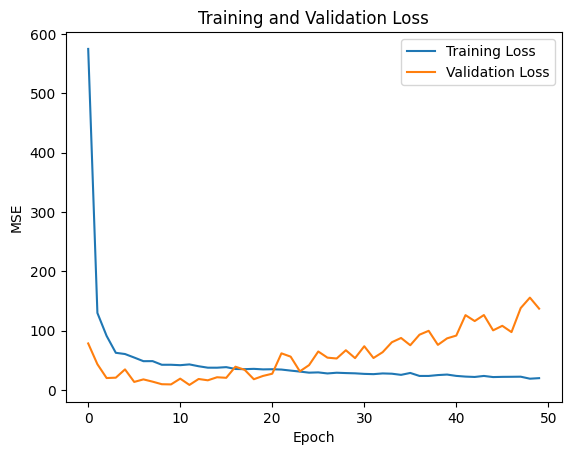

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for the ANN model
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


# Define the ANN model
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])


# Compile the model
ann_model.compile(optimizer='adam', loss='mse')

# Train the model
ann_history = ann_model.fit(X_train_sub, Y_train_sub, validation_data=(X_val, Y_val), epochs=500, batch_size=32, verbose=1)

# Predict using the ANN model
Y_pred_ann = ann_model.predict(X_test).flatten()

# Calculate the MSE for the ANN predictions
mse_ann = mean_squared_error(Capacity_data_35, Y_pred_ann)

mse_ann

Epoch 1/500
34/34 [==============================] - 2s 19ms/step - loss: 369.7920 - val_loss: 131.2088
Epoch 2/500
34/34 [==============================] - 0s 5ms/step - loss: 107.8583 - val_loss: 22.8294
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 71.1310 - val_loss: 40.3965
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 62.1570 - val_loss: 55.3237
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 51.1903 - val_loss: 28.0980
Epoch 6/500
34/34 [==============================] - 0s 5ms/step - loss: 49.4613 - val_loss: 26.1847
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 47.6454 - val_loss: 20.8847
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 48.5057 - val_loss: 53.5333
Epoch 9/500
34/34 [==============================] - 0s 5ms/step - loss: 44.5792 - val_loss: 35.3598
Epoch 10/500
34/34 [==============================] - 0s 5ms/step - loss: 44.8234 - val

10.18401529917743

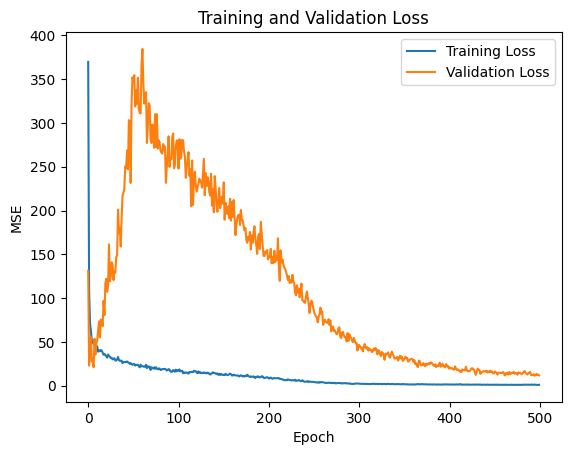

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for the ANN model
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

- Modify the Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(lr=0.0001)
ann_model.compile(optimizer=optimizer, loss='mse')

# Train the model
ann_history = ann_model.fit(X_train_sub, Y_train_sub, validation_data=(X_val, Y_val), epochs=1000, batch_size=64, verbose=1)

# Predict using the ANN model
Y_pred_ann = ann_model.predict(X_test).flatten()

# Calculate the MSE for the ANN predictions
mse_ann = mean_squared_error(Capacity_data_35, Y_pred_ann)

mse_ann

Epoch 1/1000
17/17 [==============================] - 1s 24ms/step - loss: 597.9622 - val_loss: 164.9921
Epoch 2/1000
17/17 [==============================] - 0s 16ms/step - loss: 171.5662 - val_loss: 142.7871
Epoch 3/1000
17/17 [==============================] - 0s 16ms/step - loss: 117.1623 - val_loss: 129.8865
Epoch 4/1000
17/17 [==============================] - 0s 16ms/step - loss: 91.6299 - val_loss: 133.1299
Epoch 5/1000
17/17 [==============================] - 0s 15ms/step - loss: 89.0851 - val_loss: 154.9080
Epoch 6/1000
17/17 [==============================] - 0s 15ms/step - loss: 78.9974 - val_loss: 179.5891
Epoch 7/1000
17/17 [==============================] - 0s 15ms/step - loss: 76.6615 - val_loss: 181.8068
Epoch 8/1000
17/17 [==============================] - 0s 15ms/step - loss: 73.7762 - val_loss: 218.4998
Epoch 9/1000
17/17 [==============================] - 0s 15ms/step - loss: 74.1296 - val_loss: 227.7387
Epoch 10/1000
17/17 [==============================] - 0s 17m

4.191033102466479

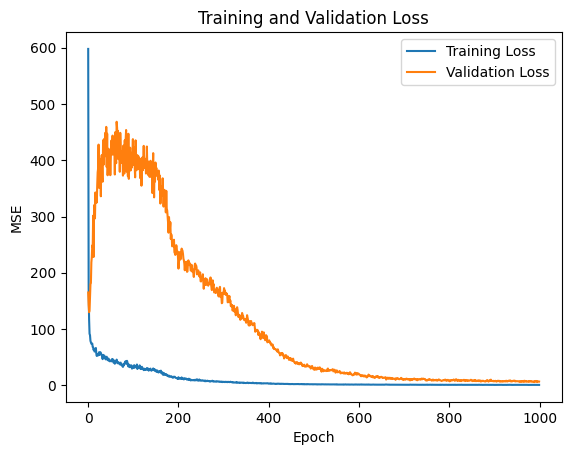

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for the ANN model
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()